# **Project Name: Netflix Movie Recommendation Engine Using SVD**

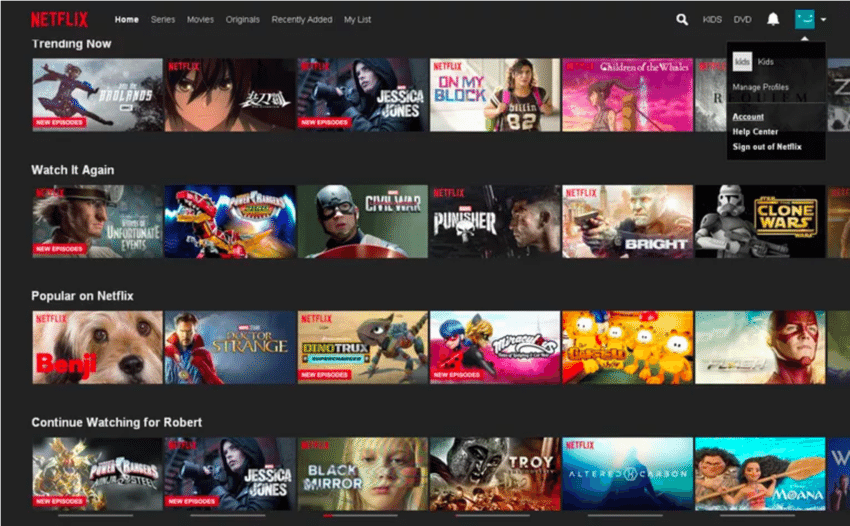

#### **Project Type:** Recommendation System | Machine Learning | Collaborative Filtering | Data Science
#### **Domain:** Entertainment (Movie Recommendation System)

## **Project Summary:**
* **Objective:** Built a personalized movie recommendation system using collaborative filtering based on Singular Value Decomposition (SVD).
* **Dataset Used:** Utilized the Netflix Prize dataset, which includes over 24 million ratings from users for thousands of movies.
* **Data Preprocessing:** Extracted and cleaned data by identifying movie IDs, converting data types, and removing rows with missing ratings.
* **Filtering Strategy:** Applied pre-filtering to eliminate low-activity users and rarely rated movies, improving model reliability.
* **Modeling Framework:** Implemented the recommendation model using the Surprise library, leveraging the SVD algorithm.
* **Evaluation Metric:** Assessed model performance using cross-validation with Root Mean Square Error (RMSE) as the key metric.
* **Recommendation Output:** Generated top-5 personalized movie suggestions for a target user by estimating user-movie ratings.

## **Problem Statement:**
Netflix has thousands of movies, it becomes difficult for users to choose what to watch next. This project aims to build a recommendation system that can predict user preferences based on their past ratings and suggest movies they are likely to enjoy. The system must efficiently manage large datasets, filter out less useful data, and provide personalized recommendations to help users discover relevant content easily.



## ***Let's Begin!!***

## **1. Import required libraries**

In [121]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab utilities
from google.colab import drive

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

## **2. Load Dataset**

In [122]:
# Mount Google Drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# Read the first data (Text file)
netflix_dataset = pd.read_csv("/content/drive/MyDrive/Netflix_data_2025/Copy of combined_data_1.txt.zip",header = None,names = ["Cust_ID","Rating"], usecols = [0,1])

In [124]:
netflix_dataset

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [125]:
# Print the number of rows and columns in dataset
netflix_dataset.shape

(24058263, 2)

## **3. Exploratory Data Analysis**

In [126]:
# where we have rating as null at that place in cust id we have movie id
netflix_dataset.isnull().sum()

,0
Cust_ID,0
Rating,4499


# Total Ratings, Users, and Movies

In [127]:
# Get the count of movies with the help of cust id and rating columns
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count['Rating']
movie_count

4499

In [128]:
# Get unique customer IDs from the dataset
total_count = netflix_dataset['Cust_ID'].unique()
total_count

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [129]:
# Count the number of unique customer IDs in the dataset
total_count = netflix_dataset['Cust_ID'].nunique()
total_count

475257

In [130]:
# Calculate customer count
customer_count = total_count - movie_count
customer_count

470758

In [131]:
# Calculate total number of ratings by users (excluding the null values)
rating_count = netflix_dataset['Cust_ID'].count() - movie_count

# Display the total number of user ratings
rating_count

24053764

In [132]:
# Group the dataset by 'Rating' and count how many times each rating (1 to 5 stars) was given
stars = netflix_dataset.groupby("Rating")["Rating"].agg(["count"])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


## Ratings Distribution

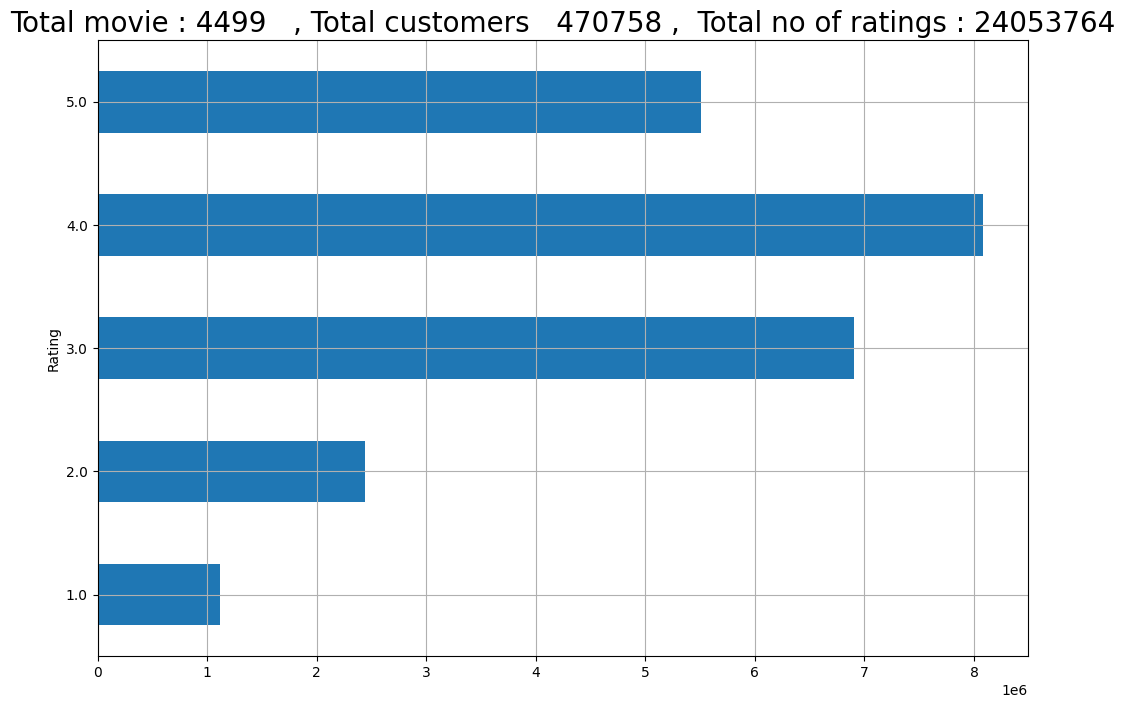

In [133]:
# Plot horizontal bar chart of star ratings
ax = stars.plot(kind = "barh", legend = False, figsize = (12,8))
plt.title(f'Total movie : {movie_count}   , Total customers   {customer_count} ,  Total no of ratings : {rating_count}', fontsize = 20)
plt.grid(True)
plt.show()

### Observations:
* Most ratings are positive. 4 is the most common, followed by 5 and 3.
* Very few users give low ratings : 1 and 2 are rare.
* The data is right-skewed, showing a bias toward higher ratings.

## Identifying Movie IDs

In [134]:
# Let's just make a clear dataframe to find how many movie id are there

movie_id = None
movie_np = [] # Empty list to store movie id

# Iterate over the dataframe rows
for i in netflix_dataset["Cust_ID"]:
  if ":" in i:
    # update the current movie ID in the column
    movie_id = int(i.replace(":",''))  # removing the : from the number
  movie_np.append(movie_id) # Adding the movie id number in the list


In [135]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [136]:
# create a column in dataset to store movie id
netflix_dataset['Movie_ID'] = movie_np

In [137]:
# It excludes the rows where the rating is Nan
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]

In [138]:
netflix_dataset

,Cust_ID,Rating,Movie_ID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [139]:
#Calculate count for 'Movie_ID'
netflix_dataset['Movie_ID'].count()

24053764

In [140]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   object 
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [141]:
# change the datatype of cust id from object to int
netflix_dataset['Cust_ID'] = netflix_dataset['Cust_ID'].astype(int)

In [142]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_ID   int64  
 1   Rating    float64
 2   Movie_ID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


## **4. Pre-filtering Technique**

To reduce noise , improve model accuracy , and optimize performance by removing sparse uninformative data before training the model

## Step 1: Filter Infrequently Rated Movies

* These movies they don't have enough data to understand what kind of people like them
* The model can't accurately position the movie in the latent (hidden) feature space

In [143]:
# count the rating of movie id
dataset_movie_summary = netflix_dataset.groupby("Movie_ID")["Rating"].agg(['count'])

In [144]:
dataset_movie_summary

,count
Movie_ID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [145]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)

In [146]:
movie_benchmark

908.0

* 60 % of all movies were rated 908 times or less
* 40 % of movies were rated more that 908 times
* The 60th percentile is a values below which 60% of the data falls

In [147]:
# If any movie is having rating less than 908 exclude that movie
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

In [148]:
# This list will store the index of all movie which are having rating less than 908
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_ID', length=2699)

In [149]:
# How many movies we are going to remove
len(drop_movie_list)

2699

## Step 2: Filter Inactive Users

* These users don't provide enough data to understand their preferences
* The model can't reliably learn their taste or recommend meaningful content

In [150]:
# Remove all the users that are inactive ( who have rated less number of movies )
dataset_cust_summary = netflix_dataset.groupby('Cust_ID')['Rating'].agg(['count'])
dataset_cust_summary

,count
Cust_ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [151]:
# Calculate 60th percentile of 'count' column
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

* 60% of users have rated 36 movies or fewer
* We will keep only the top 40% of users who are more active those who have rated more that or equal to 36 movies
* movie_benchmark - remove rarely rated movies
* cust_benhmark - remove inactive users

In [152]:
# If any user have rated less than 36 movies please remove them
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

In [153]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_ID', length=282042)

In [154]:
# how many users we are going to remove
len(drop_cust_list)

282042

## Apply Filters

#### Low rating users: Not enough signal to learn preferences

#### Low rated movies: Not enough signal to know movie category

In [155]:
# 1. Remove the movies that didn't meet the benchmark (less rated movies)
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_ID'].isin(drop_movie_list)]

we are keeping only those rows which are not in drop_movie_list

In [156]:
# 2. Remove the customers that didn't meet the benchmark (inactive users)
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_ID'].isin(drop_cust_list)]

we are keeping only those rows which are not in drop_cust_list

In [157]:
# Final shape after removing the extra users and extra less rated movies
netflix_dataset

,Cust_ID,Rating,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


## **5. Model Building using SVD**

#### **SVD (Singular Value Decomposition)** is a matrix factorization technique used in recommendation systems to identify latent factors underlying user-item interactions. Here’s how it works:

* **Input data:** A user-item rating matrix, where most ratings are missing since users haven’t rated all items.

* **Process:** SVD decomposes this sparse matrix into lower-dimensional user and item matrices, capturing latent features that represent user preferences and item characteristics.

* **Output:** By multiplying these matrices, SVD predicts missing ratings, enabling the system to recommend items that users are likely to rate highly.



In [158]:
# load the second dataset for movie names as with the previous dataset we only have movie id
df_title = pd.read_csv("/content/drive/MyDrive/Netflix_data_2025/Copy of movie_titles.csv",
                       encoding = "ISO-8859-1",
                       header = None,
                       names = ["Movie_ID", "Year","Name"],
                       usecols = [0,1,2])

In [159]:
df_title

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


## Install Required Libraries

In [160]:
pip install numpy==1.24.4

In [161]:
!pip install scikit-surprise

## Load Data into Surprise

* **Surprise:**  Python library for building and evaluating recommendation systems
* **Reader:** Defines the rating scale for Surprise library
* **Dataset:** Loads the dataset into Surprise format
* **SVD:** The core recommendation algorithm used
* **cross_validate:** Performs k-fold cross-validation to evaluate model performance, returning metrics like RMSE and MAE


In [162]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate


In [163]:
# Create a Reader object
reader = Reader()

In [164]:
# We only work with the top 100k records for quick runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_ID','Movie_ID','Rating']][:100000],reader)

In [165]:
# creating a SVD model
model = SVD()

In [166]:
# Training the model with the top 100 k records
cv_results=cross_validate(model,data,measures = ['RMSE'],cv = 3)

In [167]:
cv_results

{'test_rmse': array([1.01904558, 1.01650014, 1.02098618]),
 'fit_time': (1.6275362968444824, 2.5781562328338623, 4.780127763748169),
 'test_time': (0.731722354888916, 0.38875746726989746, 0.6657781600952148)}

In [168]:
# Calculate average RMSE across folds
avg_rmse = np.mean(cv_results['test_rmse'])
print(f"Average RMSE across 3 folds: {avg_rmse:.4f}")

Average RMSE across 3 folds: 1.0188


In [169]:
netflix_dataset

,Cust_ID,Rating,Movie_ID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


## **6. Recommendation for a Specific User**

## Predict for User ID: 1331154

In [170]:
# Filter the data for finding a specific user 1331154 to whom we are going to suggest the movie
user_rating = netflix_dataset[netflix_dataset['Cust_ID'] == 1331154]
user_rating

,Cust_ID,Rating,Movie_ID
697,1331154,4.0,3
5178,1331154,4.0,8
31460,1331154,3.0,18
92840,1331154,4.0,30
224761,1331154,3.0,44
...,...,...,...
23439584,1331154,4.0,4389
23546489,1331154,2.0,4402
23649431,1331154,4.0,4432
23844441,1331154,3.0,4472


### User 1331154 have rated 253 movies

In [171]:
# Make a copy of each individual customer for recommendation
user_1331154 = df_title.copy()
user_1331154

,Movie_ID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [172]:
# Remove the less rated movies from the 2nd dataset also
user_1331154 = user_1331154[~user_1331154['Movie_ID'].isin(drop_movie_list)]

In [173]:
user_1331154

,Movie_ID,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [174]:
# predicting the rating for a specific user 1331154 across all movies
user_1331154['Estimated_Score'] = user_1331154['Movie_ID'].apply(lambda x : model.predict(1331154,x).est)

###    **.est** gives the predict score (estimated rating)

In [175]:
user_1331154

,Movie_ID,Year,Name,Estimated_Score
2,3,1997.0,Character,3.742362
4,5,2004.0,The Rise and Fall of ECW,3.704731
5,6,1997.0,Sick,3.398872
7,8,2004.0,What the #$*! Do We Know!?,3.891075
15,16,1996.0,Screamers,3.073426
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.644663
17766,17767,2004.0,Fidel Castro: American Experience,3.644663
17767,17768,2000.0,Epoch,3.644663
17768,17769,2003.0,The Company,3.644663


###  It uses the trained SVD model to predict the ratings that user 1331154 would give to that movie

## Top 5 Recommended Movies to user 1331154

In [176]:
# Display the top 5 movies with the highest estimates score that user 1331154 can like
top_rated_movies=user_1331154.sort_values("Estimated_Score", ascending = False)

In [177]:
top_rated_movies.head()

,Movie_ID,Year,Name,Estimated_Score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.157000
29,30,2003.0,Something's Gotta Give,3.984705
27,28,2002.0,Lilo and Stitch,3.961366
7,8,2004.0,What the #$*! Do We Know!?,3.891075
2,3,1997.0,Character,3.742362


# **Business Conclusion:**

* In this project, we built a personalized movie recommendation system for Netflix using the SVD (Singular Value Decomposition) algorithm. The system uses user ratings to understand preferences and suggest movies that users are likely to enjoy.

* Key results:
1. The model gives **relevant movie suggestions** based on users' past ratings.

2.  **We filtered out low-activity users and rarely rated movies**, which helped improve accuracy.

3. The model achieved an **average RMSE of 1.0188**, showing good prediction performance.

4. We provided **top-5 movie recommendations** for a specific user, showing how the system can work in real-world situations.

5. This kind of recommendation system can help platforms like Netflix to improve user experience, increase watch time, and keep users more engaged by helping them find interesting content easily.